In [1]:
# 导入依赖包
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 导入数据
wine = pd.read_csv("./input/wine.csv")
# 查看前五行
wine.head(5)

,Class,Alcohol,Malic acid,Attribute,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# 0-1标准化
minmax_scale = preprocessing.MinMaxScaler().fit(wine[['Alcohol','Malic acid']])
np_minmax = minmax_scale.transform(wine[['Alcohol','Malic acid']])

# z-score标准化
std_scale = preprocessing.StandardScaler().fit(wine[['Alcohol','Malic acid']])
np_std = std_scale.transform(wine[['Alcohol','Malic acid']])

In [4]:
# 0-1标准化后，两个特征变量的最小值
print("0-1标准化后两个指标的最小值：\n", "Alcohol最小值为", np_minmax[:, 0].min(), "Malic acid最小值为", np_minmax[:, 1].min())
# 0-1标准化后，两个特征变量的最大值
print("0-1标准化后两个指标的最大值：\n", "Alcohol最大值为", np_minmax[:, 0].max(), "Malic acid最大值为", np_minmax[:, 1].max())

0-1标准化后两个指标的最小值：
 Alcohol最小值为 0.0 Malic acid最小值为 0.0
0-1标准化后两个指标的最大值：
 Alcohol最大值为 1.0 Malic acid最大值为 1.0


In [5]:
# z-score标准化后，两个特征变量的最小值
print("z-score标准化后两个指标的最小值：\n", "Alcohol最小值为", np_std[:, 0].min(), "Malic acid最小值为", np_std[:, 1].min())
# z-score标准化后，两个特征变量的最大值
print("z-score标准化后两个指标的最大值：\n", "Alcohol最大值为", np_std[:, 0].max(), "Malic acid最大值为", np_std[:, 1].max())
# 0-1标准化后
print("0-1标准化后前五行")
print(np_minmax[0:5,:])
# z-score标准化后
print("z-score标准化后前五行")
print(np_std[0:5,:])

z-score标准化后两个指标的最小值：
 Alcohol最小值为 -2.4342353470856977 Malic acid最小值为 -1.4329830495567168
z-score标准化后两个指标的最大值：
 Alcohol最大值为 2.2597715200031785 Malic acid最大值为 3.1091924671589037
0-1标准化后前五行
[[0.84210526 0.1916996 ]
 [0.57105263 0.2055336 ]
 [0.56052632 0.3201581 ]
 [0.87894737 0.23913043]
 [0.58157895 0.36561265]]
z-score标准化后前五行
[[ 1.51861254 -0.5622498 ]
 [ 0.24628963 -0.49941338]
 [ 0.19687903  0.02123125]
 [ 1.69154964 -0.34681064]
 [ 0.29570023  0.22769377]]


<Figure size 1000x1000 with 0 Axes>

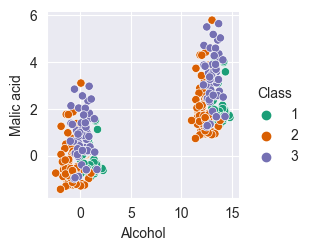

In [6]:
# 获取数据备份
df_minmax = wine.copy()
df_std = wine.copy()
# 将前面标准化后的数据替换进备份
df_minmax[['Alcohol','Malic acid']] = np_minmax
df_std[['Alcohol','Malic acid']] = np_std
# 合并数据集
wine_contrast = pd.concat([wine, df_minmax, df_std], axis=0)
# 调用seaborn工具包的方法，绘制散点图。
# 创建画布
plt.figure(figsize=(10, 10))
# 指定x轴和y轴的数据集和坐标轴标识
sns.pairplot(hue="Class", data=wine_contrast, x_vars="Alcohol", y_vars="Malic acid",palette="Dark2")
# 显示图像
plt.show()


<Figure size 1000x1000 with 0 Axes>

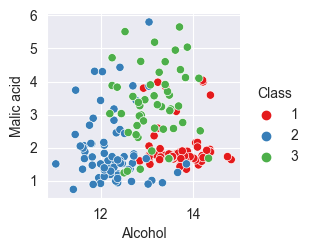

In [7]:
# 画出原数据散点图
# 创建画布
plt.figure(figsize=(10, 10))
# 指定x轴和y轴的数据集和坐标轴标识
sns.pairplot(hue="Class", data=wine, x_vars="Alcohol", y_vars="Malic acid",palette="Set1")
plt.show()

<Figure size 1000x1000 with 0 Axes>

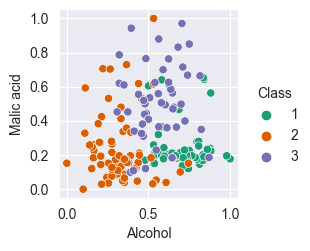

In [8]:
# 画出0-1标准化后散点图
# 创建画布
plt.figure(figsize=(10, 10))
# 指定x轴和y轴的数据集和坐标轴标识
sns.pairplot(hue="Class", data=df_minmax, x_vars="Alcohol", y_vars="Malic acid",palette="Dark2")
plt.show()


<Figure size 1000x1000 with 0 Axes>

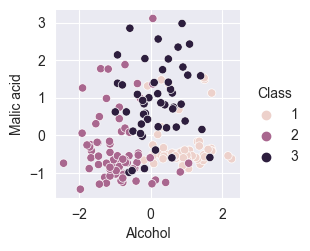

In [9]:
# 画出z-score标准化后的散点图
# 创建画布
plt.figure(figsize=(10, 10))
# 指定x轴和y轴的数据集和坐标轴标识
sns.pairplot(hue="Class", data=df_std, x_vars="Alcohol", y_vars="Malic acid")
plt.show()

In [10]:
# 保存0-1标准化后的数据
df_minmax.to_csv("./output/minmax.csv",index = False)

# 保存z-score标准化后的数据
df_std.to_csv("./output/std.csv",index = False)
